Mounted at /content/drive
Training Bernoulli Naive Bayes...
Performance metrics for Bernoulli Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.20      0.14         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.25      0.60      0.35         5

    accuracy                           0.28        25
   macro avg       0.27      0.28      0.25        25
weighted avg       0.27      0.28      0.25        25

Accuracy: 0.28
Sensitivity: 0.27999999999999997
Precision: 0.27222222222222225
F1 Score: 0.24915966386554622



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

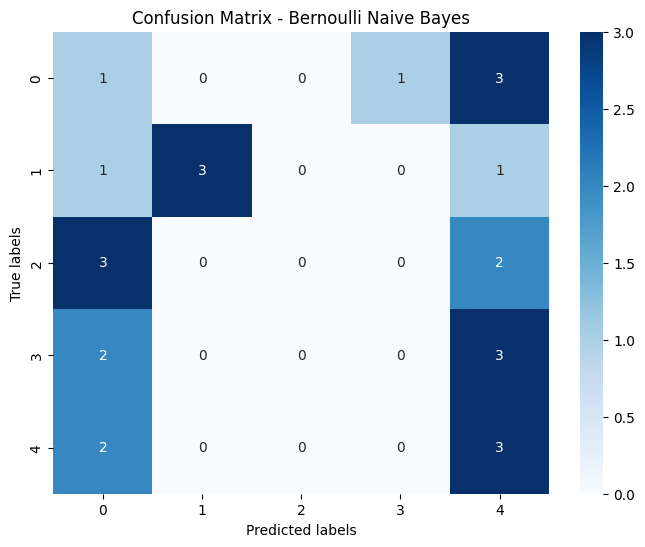

Training Multinomial Naive Bayes...
Performance metrics for Multinomial Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.60      0.75         5
           2       0.33      0.20      0.25         5
           3       0.29      0.40      0.33         5
           4       0.18      0.40      0.25         5

    accuracy                           0.32        25
   macro avg       0.36      0.32      0.32        25
weighted avg       0.36      0.32      0.32        25

Accuracy: 0.32
Sensitivity: 0.32
Precision: 0.3601731601731602
F1 Score: 0.31666666666666665



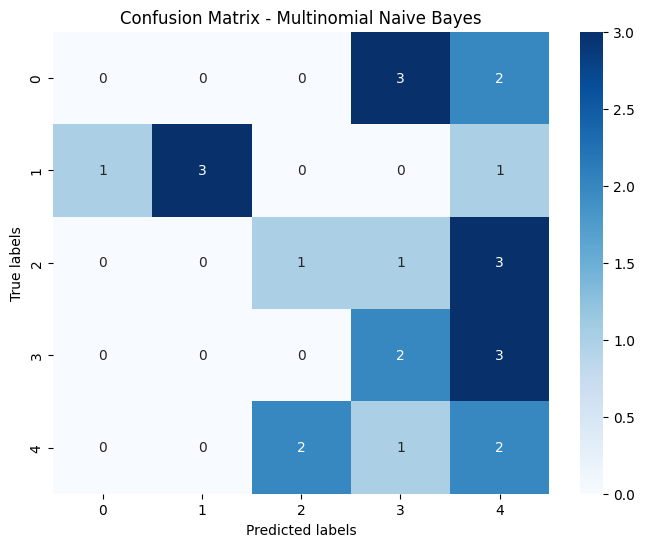

Training Complement Naive Bayes...
Performance metrics for Complement Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.80      0.80      0.80         5
           2       0.00      0.00      0.00         5
           3       0.17      0.20      0.18         5
           4       0.23      0.60      0.33         5

    accuracy                           0.32        25
   macro avg       0.24      0.32      0.26        25
weighted avg       0.24      0.32      0.26        25

Accuracy: 0.32
Sensitivity: 0.32
Precision: 0.23948717948717949
F1 Score: 0.26303030303030306



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

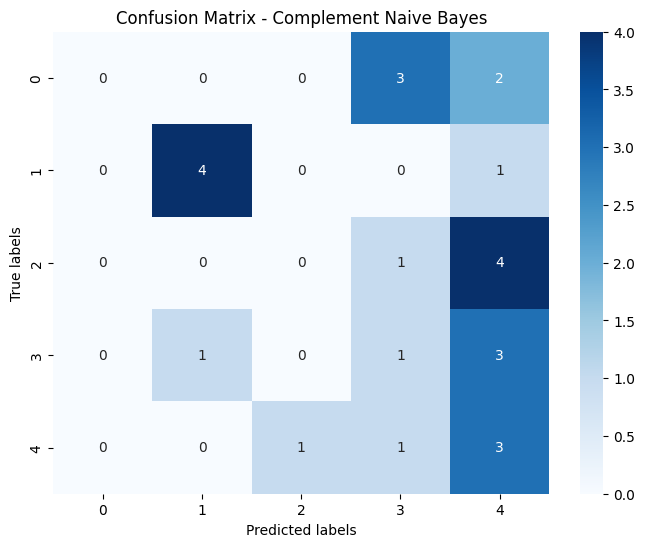

Training Gaussian Naive Bayes...
Performance metrics for Gaussian Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.50      0.60      0.55         5
           2       1.00      0.40      0.57         5
           3       0.38      0.60      0.46         5
           4       0.20      0.20      0.20         5

    accuracy                           0.40        25
   macro avg       0.47      0.40      0.40        25
weighted avg       0.47      0.40      0.40        25

Accuracy: 0.4
Sensitivity: 0.4000000000000001
Precision: 0.465
F1 Score: 0.40012876012876014



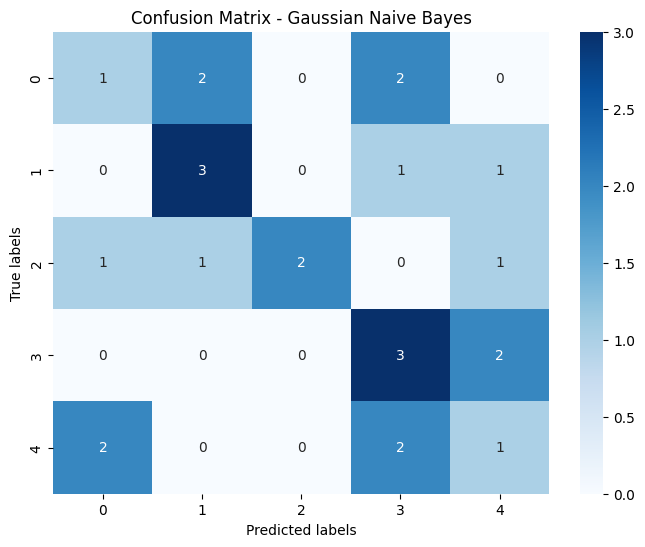

In [1]:
import os
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing import image
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/DR_50/Train'
test_dir = '/content/drive/MyDrive/DR_50/Test'
valid_dir = '/content/drive/MyDrive/DR_50/Valid'

# Image dimensions
img_width, img_height = 224, 224  # Adjust according to your image dimensions
batch_size = 32
num_epochs = 20
num_classes = 5  # Change according to your number of classes

# Define input shape
input_shape = (img_width, img_height, 3)

# Define the input layer
inputs = Input(shape=input_shape)

# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(inputs)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Flatten the output for fully connected layers
x = Flatten(name='flatten')(x)

# Fully connected layers
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)

# Output layer
outputs = Dense(num_classes, activation='softmax', name='predictions')(x)

# Create the model
model = Model(inputs, outputs)

# Load images and extract features
def load_and_extract_features(directory):
    x, y = [], []
    for i in range(5):
        class_dir = os.path.join(directory, str(i))
        for img_path in os.listdir(class_dir):
            img = image.load_img(os.path.join(class_dir, img_path), target_size=(img_width, img_height))
            img_data = image.img_to_array(img)
            x.append(img_data)
            y.append(i)
    x = np.array(x)
    y = np.array(y)
    return x, y

x_train, y_train = load_and_extract_features(train_dir)
x_test, y_test = load_and_extract_features(test_dir)

# Preprocess input images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Train classifiers
classifiers = {
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    # Train classifier
    clf.fit(x_train.reshape(-1, img_width * img_height * 3), y_train)
    # Predict on test set
    y_pred = clf.predict(x_test.reshape(-1, img_width * img_height * 3))
    # Print performance metrics
    print(f'Performance metrics for {clf_name}:')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    # Additional performance metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    sensitivity = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')
    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity: {sensitivity}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}\n')
    # Plot confusion matrix
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)

    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
